# Installing dependencies

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 39.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Installing dataset directly from roboflow site

In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="IVbw8GePPFfYhH9xk6mu")
project = rf.workspace("majorproject-25tao").project("american-sign-language-v36cz")
version = project.version(2)
dataset = version.download("yolov11", location='dataset')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset in yolov11:: 100%|██████████| 40560/40560 [00:06<00:00, 5833.36it/s]


#Yolo11 Architecture

In [ ]:
with open('/content/yolo11.yaml', 'r') as file:
    content = file.read()
    print(content)

# Ultralytics YOLO 🚀, AGPL-3.0 license
# YOLO11 object detection model with P3-P5 outputs. For Usage examples see https://docs.ultralytics.com/tasks/detect

# Parameters
nc: 80 # number of classes
scales: # model compound scaling constants, i.e. 'model=yolo11n.yaml' will call yolo11.yaml with scale 'n'
  # [depth, width, max_channels]
  n: [0.50, 0.25, 1024] # summary: 319 layers, 2624080 parameters, 2624064 gradients, 6.6 GFLOPs
  s: [0.50, 0.50, 1024] # summary: 319 layers, 9458752 parameters, 9458736 gradients, 21.7 GFLOPs
  m: [0.50, 1.00, 512] # summary: 409 layers, 20114688 parameters, 20114672 gradients, 68.5 GFLOPs
  l: [1.00, 1.00, 512] # summary: 631 layers, 25372160 parameters, 25372144 gradients, 87.6 GFLOPs
  x: [1.00, 1.50, 512] # summary: 631 layers, 56966176 parameters, 56966160 gradients, 196.0 GFLOPs

# YOLO11n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [64, 3, 2]] # 0-P1/2
  - [-1, 1, Conv, [128, 3, 2]] # 1-P2/4
  - [-1, 2, C3k2, [256, Fal

# Training yolo11m model

In [ ]:
model = YOLO("yolo11m.pt")

model.train(data="/content/dataset/data.yaml",
           imgsz=640,
           epochs=10,
           device="cuda:0")

100%|██████████| 38.8M/38.8M [00:00<00:00, 51.5MB/s]


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 149MB/s]


Overriding model.yaml nc=80 with nc=106

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralyti

100%|██████████| 5.35M/5.35M [00:00<00:00, 376MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 17906 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17906/17906 [00:10<00:00, 1781.30it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/dataset/valid/labels... 1546 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1546/1546 [00:01<00:00, 1019.03it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.1e-05, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      8.96G      1.276      3.555      1.541          2        640: 100%|██████████| 1120/1120 [11:23<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:25<00:00,  1.89it/s]


                   all       1546       1564       0.77      0.796       0.86      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.86G      1.053      1.026      1.299          2        640: 100%|██████████| 1120/1120 [11:17<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.97it/s]


                   all       1546       1564      0.855      0.895       0.94      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.88G      1.006     0.7108      1.257          2        640: 100%|██████████| 1120/1120 [10:59<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.97it/s]


                   all       1546       1564      0.883      0.947      0.966      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.88G     0.9608     0.5766      1.225          2        640: 100%|██████████| 1120/1120 [10:56<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.98it/s]

                   all       1546       1564      0.915      0.935      0.967      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.88G     0.9141     0.4841      1.194          2        640: 100%|██████████| 1120/1120 [10:56<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.98it/s]


                   all       1546       1564      0.941      0.941      0.969      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.88G     0.8685     0.4245      1.165          2        640: 100%|██████████| 1120/1120 [11:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  2.03it/s]


                   all       1546       1564       0.91      0.965       0.98      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.88G     0.8335     0.3817      1.136          2        640: 100%|██████████| 1120/1120 [10:58<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.05it/s]


                   all       1546       1564      0.943      0.949      0.973      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      8.88G     0.7975     0.3496      1.118          2        640: 100%|██████████| 1120/1120 [10:58<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:25<00:00,  1.94it/s]


                   all       1546       1564      0.939      0.958      0.983       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.87G     0.7631     0.3238      1.092          2        640: 100%|██████████| 1120/1120 [10:58<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.97it/s]


                   all       1546       1564      0.951      0.965      0.985      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.88G     0.7304     0.3054      1.074          3        640: 100%|██████████| 1120/1120 [10:57<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.96it/s]


                   all       1546       1564      0.944      0.967      0.985      0.766

10 epochs completed in 1.927 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,111,758 parameters, 0 gradients, 68.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:26<00:00,  1.83it/s]


                   all       1546       1564      0.944      0.968      0.985      0.766
                     A          2          2      0.879          1      0.995      0.895
                     B          8          8      0.987          1      0.995      0.855
                     C          3          3      0.727          1      0.995      0.809
                     D          4          4      0.657          1      0.995      0.859
                     E          4          4      0.938          1      0.995      0.873
                     F          7          7      0.933          1      0.995      0.879
                     G          4          4      0.933          1      0.995      0.807
                     H          5          5       0.83          1      0.995      0.777
                     J          5          5      0.934          1      0.995      0.497
                     K          6          6          1      0.757      0.955      0.866
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b49a5db9180>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.

#Training Results

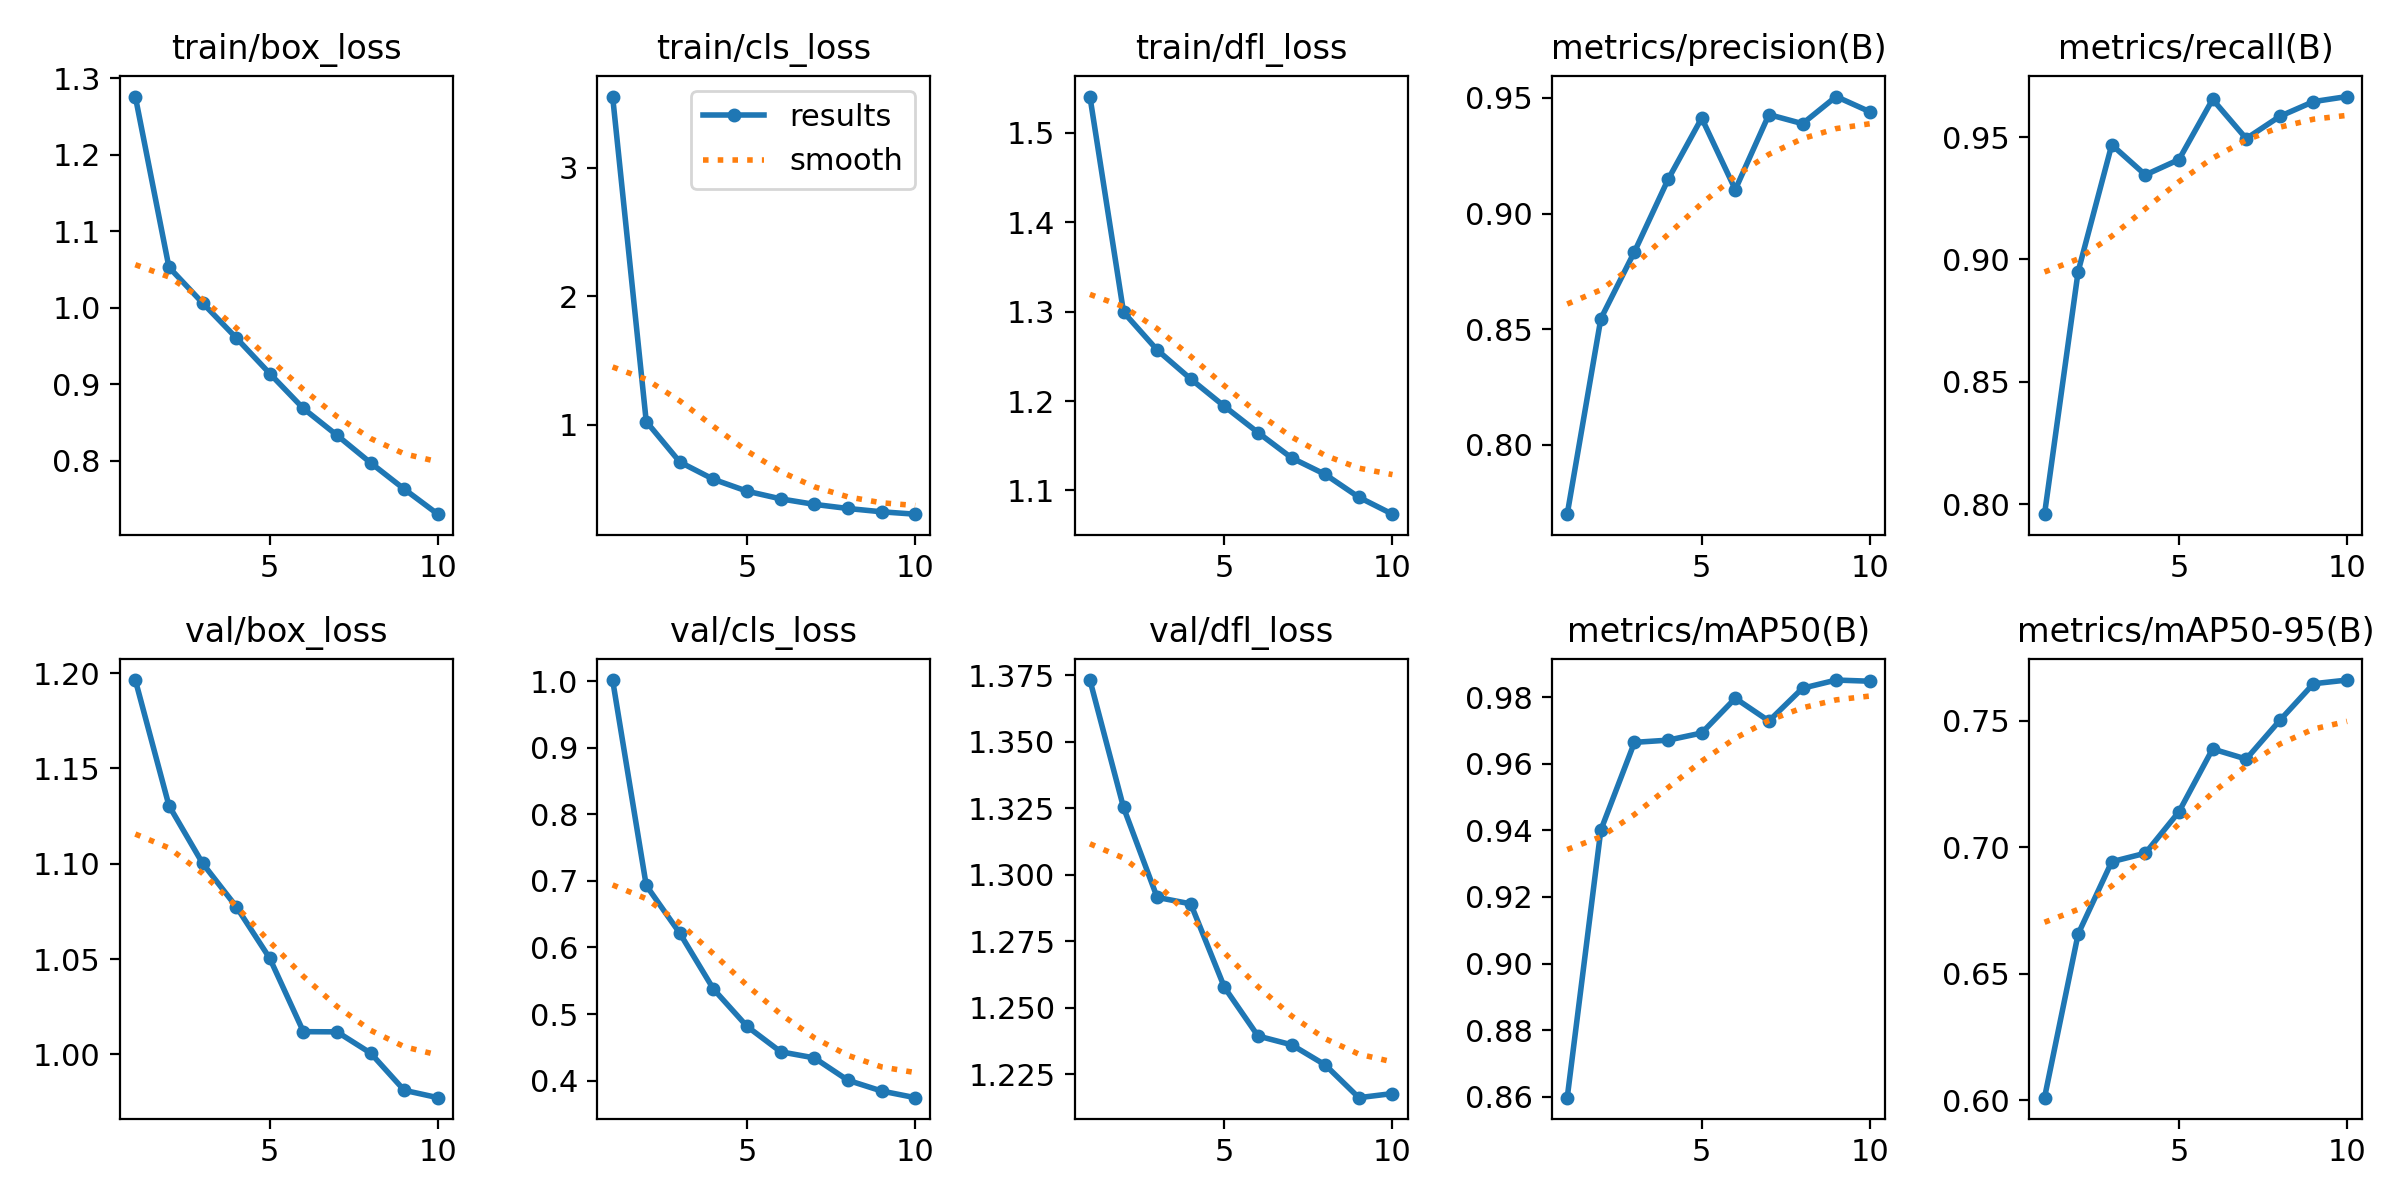

In [ ]:
Image("/content/runs/detect/train/results.png", width=1000)

In [ ]:
import pandas as pd
results= '/content/runs/detect/train/results.csv'
df = pd.read_csv(results)

In [ ]:
df['f1_score'] = 2 * (df['metrics/precision(B)'] * df['metrics/recall(B)']) / (df['metrics/precision(B)'] + df['metrics/recall(B)'])
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,f1_score
0,1,717.868,1.27605,3.55485,1.54050,0.77001,0.79591,0.85977,0.60104,1.19631,1.00150,1.37322,0.000030,0.000030,0.000030,0.782746
1,2,1422.950,1.05308,1.02640,1.29942,0.85453,0.89506,0.94008,0.66569,1.13049,0.69309,1.32533,0.000055,0.000055,0.000055,0.874326
2,3,2108.880,1.00640,0.71084,1.25715,0.88345,0.94686,0.96641,0.69423,1.10023,0.62124,1.29156,0.000073,0.000073,0.000073,0.914057
3,4,2794.190,0.96083,0.57659,1.22464,0.91472,0.93456,0.96707,0.69760,1.07755,0.53749,1.28911,0.000064,0.000064,0.000064,0.924534
4,5,3481.790,0.91409,0.48406,1.19413,0.94126,0.94082,0.96922,0.71398,1.05036,0.48142,1.25777,0.000055,0.000055,0.000055,0.941040
5,6,4175.120,0.86846,0.42451,1.16477,0.91035,0.96542,0.97964,0.73877,1.01192,0.44333,1.23945,0.000046,0.000046,0.000046,0.937077
6,7,4864.070,0.83349,0.38172,1.13642,0.94278,0.94939,0.97282,0.73478,1.01183,0.43416,1.23615,0.000037,0.000037,0.000037,0.946073
7,8,5549.730,0.79746,0.34959,1.11796,0.93884,0.95850,0.98266,0.75007,1.00068,0.40057,1.22858,0.000028,0.000028,0.000028,0.948568
8,9,6240.580,0.76313,0.32383,1.09245,0.95057,0.96451,0.98511,0.76453,0.98117,0.38446,1.21628,0.000019,0.000019,0.000019,0.957489
9,10,6930.090,0.73038,0.30536,1.07351,0.94401,0.96658,0.98476,0.76599,0.97731,0.37445,1.21783,0.000010,0.000010,0.000010,0.955162


In [ ]:
train_metrics = df.iloc[9]

print(f"Training Metrics:")
print(f"Mean Average Precision: {train_metrics['metrics/mAP50(B)']}")
print(f"Precision: {train_metrics['metrics/precision(B)']}")
print(f"Recall: {train_metrics['metrics/recall(B)']}")
print(f"F1 Score: {train_metrics['f1_score']}")

Training Metrics:
Mean Average Precision: 0.98476
Precision: 0.94401
Recall: 0.96658
F1 Score: 0.9551616891117404


#Validation results

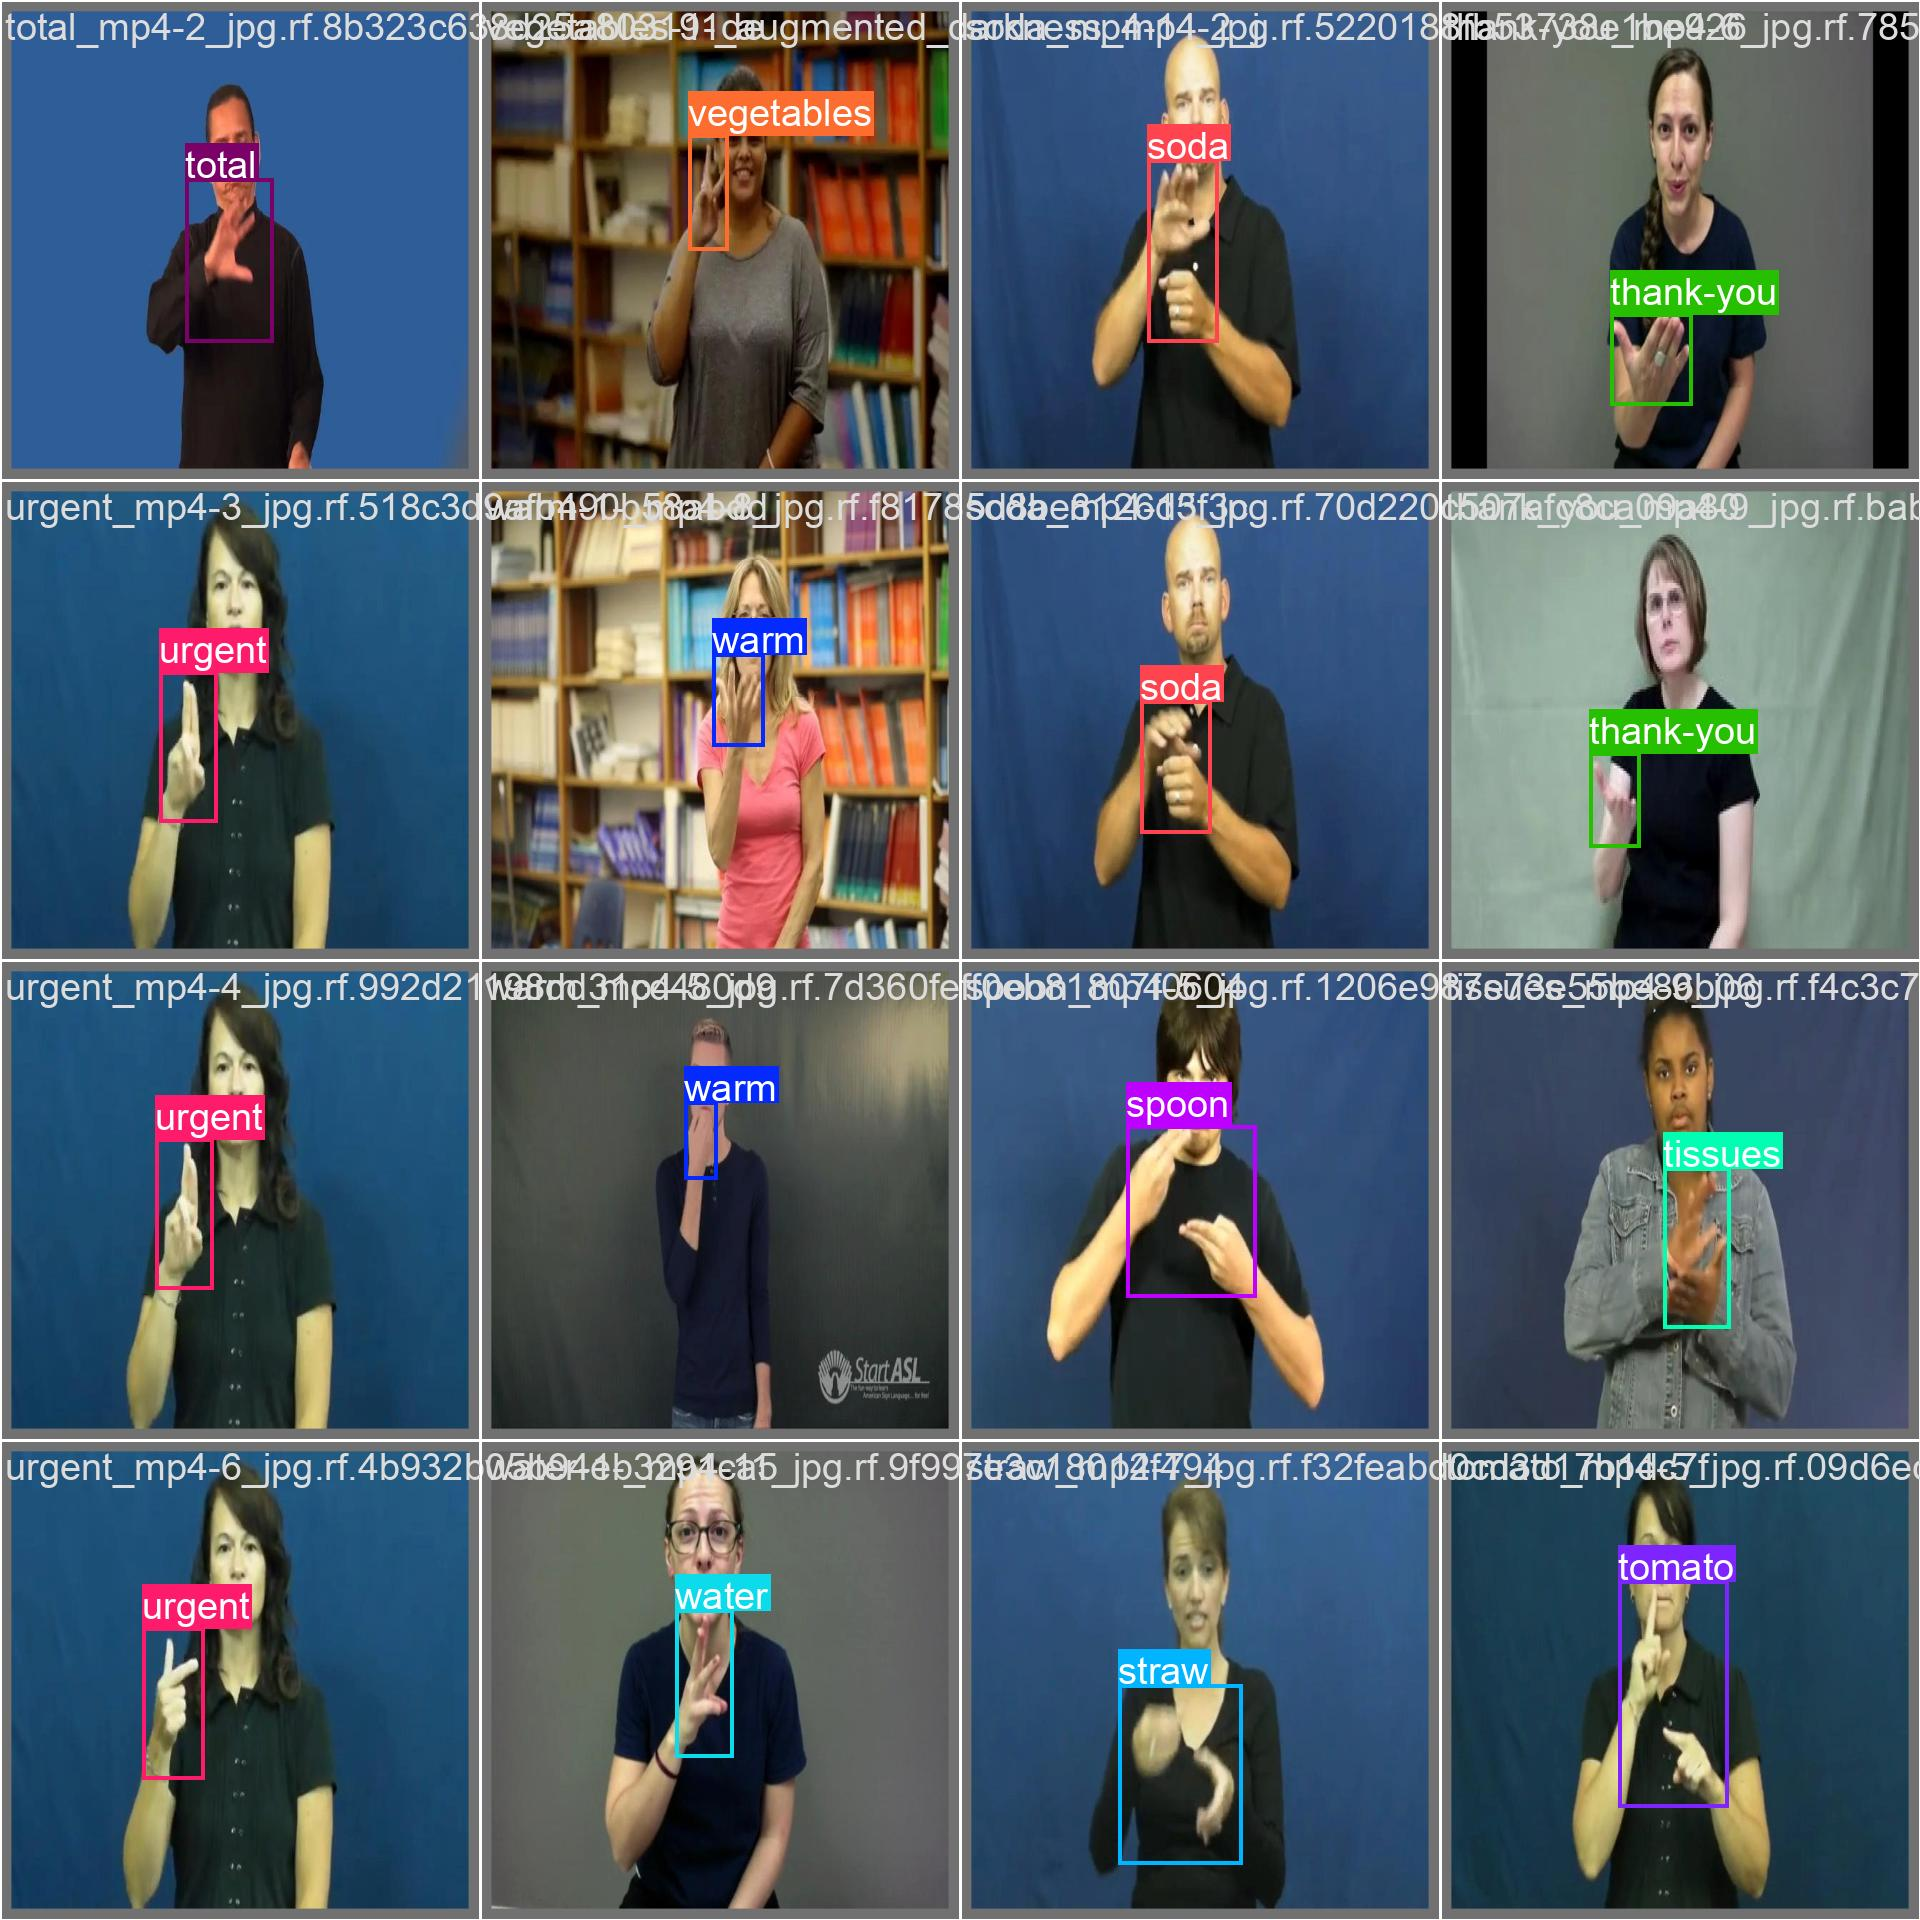

In [ ]:
Image("/content/runs/detect/train/val_batch0_labels.jpg", width=500)

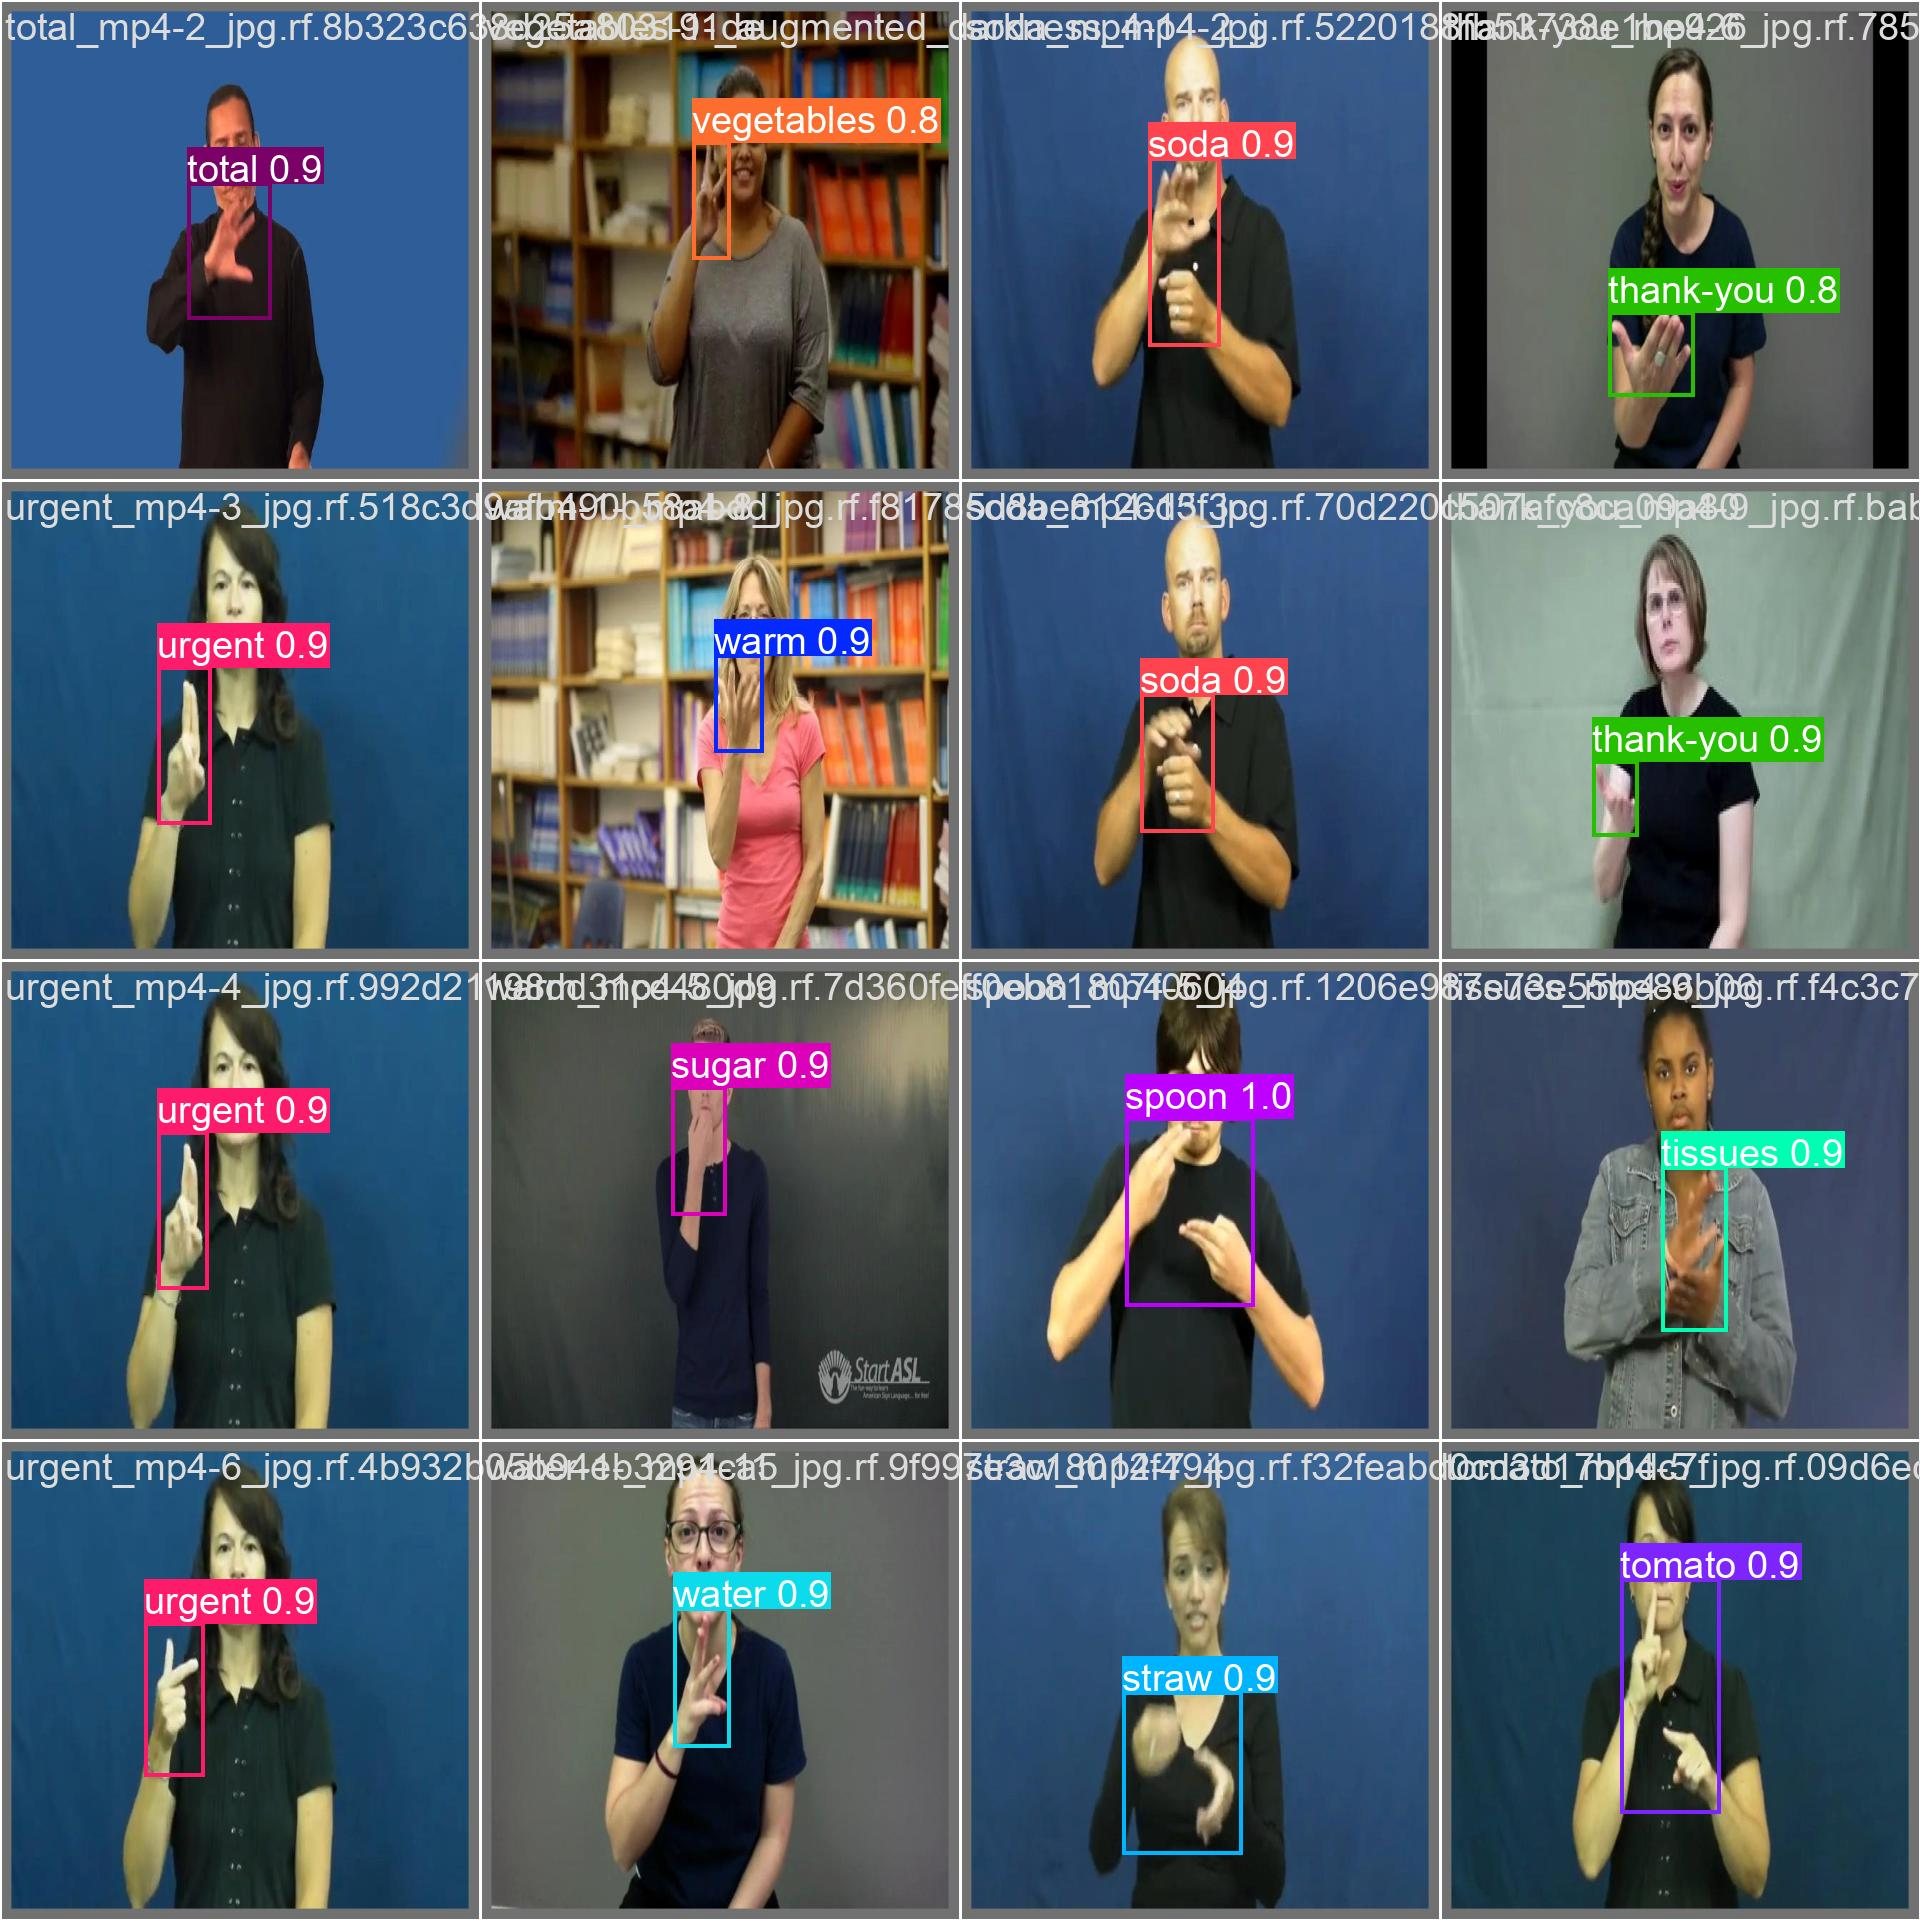

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width = 500)

# Inference with trained Model on Test set images

In [ ]:
best_model = YOLO("/content/runs/detect/train/weights/best.pt")
test_results = best_model.predict(source="/content/dataset/test/images", save=True)


image 1/822 /content/dataset/test/images/-ePyJBmOJ9s_mp4-8_jpg.rf.a8b56428bbe8d2b80bc050fbbbc514c0.jpg: 640x640 1 chicken, 37.4ms
image 2/822 /content/dataset/test/images/01831_augmented_darkness_mp4-11_jpg.rf.671ae9fc1c98e3cbc5c1c9bfda6b510c.jpg: 640x640 1 alcohol, 37.4ms
image 3/822 /content/dataset/test/images/01831_augmented_darkness_mp4-7_jpg.rf.609ce414c5f5952cdb957434f547c51b.jpg: 640x640 1 alcohol, 37.3ms
image 4/822 /content/dataset/test/images/01831_mp4-5_jpg.rf.a823f68cb36365cb747e7054e1a6d9af.jpg: 640x640 1 alcohol, 37.3ms
image 5/822 /content/dataset/test/images/01831_mp4-8_jpg.rf.7965574e4f96a9dcf40deee426ef6b54.jpg: 640x640 1 alcohol, 36.1ms
image 6/822 /content/dataset/test/images/01832_augmented_shifting_mp4-7_jpg.rf.4065049c052d8630e16552061b366d5d.jpg: 640x640 1 alcohol, 22.8ms
image 7/822 /content/dataset/test/images/01836_augmented_shifting_mp4-2_jpg.rf.402b86999ab98d9e1098993e12715bfd.jpg: 640x640 1 alcohol, 22.7ms
image 8/822 /content/dataset/test/images/1655257

#Test Metrics

In [ ]:
test_metrics = best_model.val(data="/content/dataset/data.yaml", split="test")

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/test/labels... 822 images, 0 backgrounds, 0 corrupt: 100%|██████████| 822/822 [00:00<00:00, 1583.13it/s]

val: New cache created: /content/dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:25<00:00,  2.01it/s]


                   all        822        830      0.958      0.958       0.98      0.749
                     A          1          1      0.863          1      0.995      0.995
                     B          1          1      0.861          1      0.995      0.796
                     C          3          3      0.932          1      0.995      0.887
                     F          2          2       0.75          1      0.995      0.824
                     G          4          4      0.964          1      0.995      0.804
                     H          1          1      0.844          1      0.995      0.796
                     I          2          2      0.841        0.5      0.523      0.471
                     J          4          4      0.921          1      0.995      0.638
                     K          3          3          1      0.621      0.995       0.81
                     M          2          2      0.906          1      0.995      0.895
                     

In [ ]:
import numpy as np

print(f"Testing Metrics:")
print(f"Mean Average Precision: {test_metrics.box.map50}")
print(f"Precision: {test_metrics.box.mp}")
print(f"Recall: {test_metrics.box.mr}")
test_f1_score = np.mean(test_metrics.box.f1)
print(f"F1 Score: {test_f1_score}")


Testing Metrics:
Mean Average Precision: 0.9795211162411303
Precision: 0.957824208242933
Recall: 0.957551676142314
F1 Score: 0.9507314892342847


#Prediction on test set images


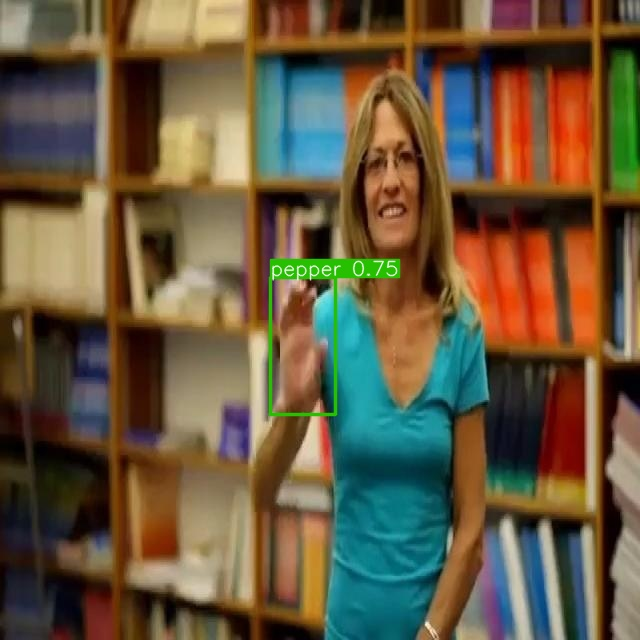

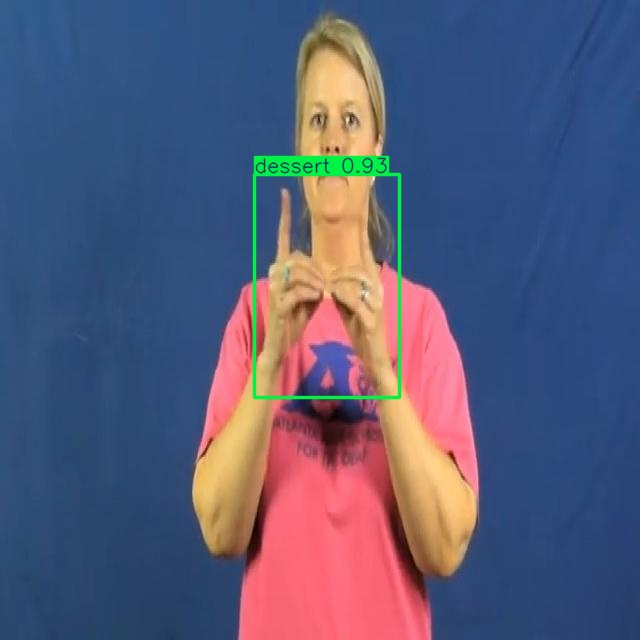

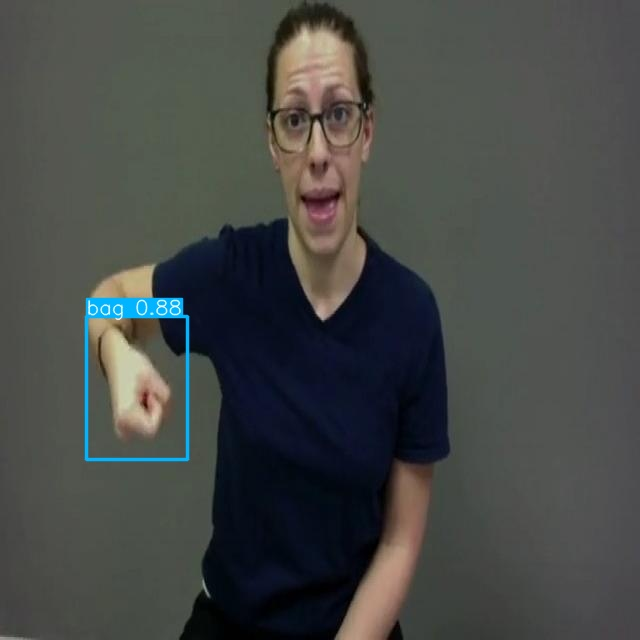

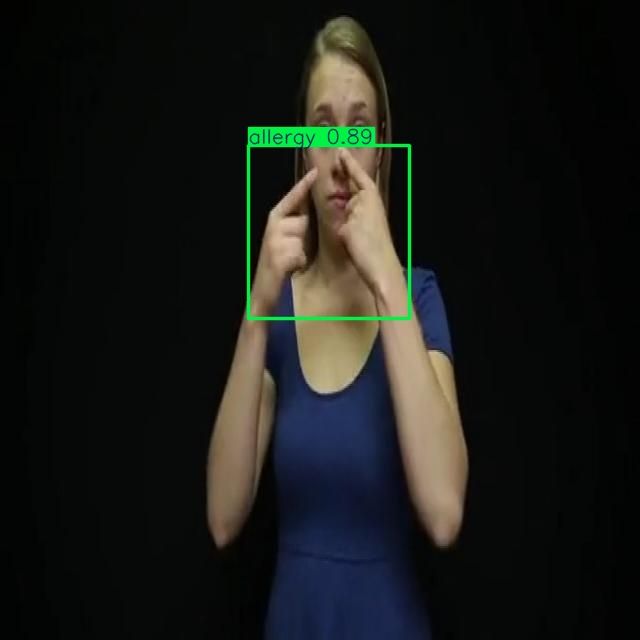

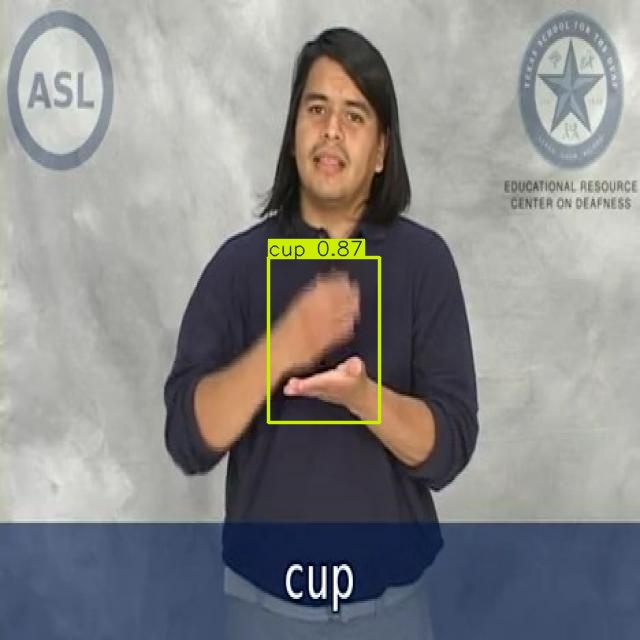

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

folder_path = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{folder_path}/*.jpg')[1:6]:
    display(IPyImage(filename=img, width=500))
    print("\n")